## This script will create pdfs of both model output and TRMM data for certain gridpoints

In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import xarray as xr
import numpy as np
import pandas as pd
import glob
import re
from scipy.stats.kde import gaussian_kde
from numpy import linspace
import cartopy.crs as ccrs
import matplotlib

In [2]:
trmm14=xr.open_dataset('../parameterization_exp/trmm_2014_JunAug.nc')
trmm15=xr.open_dataset('../parameterization_exp/trmm_2015_JunAug.nc')
ti,la,lo=np.shape(trmm14.PPT)
trmm=np.zeros([184,la,lo])
trmm[:92,:,:]=trmm14.PPT
trmm[92:,:,:]=trmm15.PPT

In [3]:
chiangsaen_loc={'lat':20.27416667,'lon':100.09083333}
mukdahan_loc={'lat':16.54000000,'lon':104.73666667}
kratie_loc={'lat':12.47666667,'lon':106.01500000}
print(chiangsaen_loc['lat'])

20.27416667


In [4]:
def pos(loc,frame):
    for i,val in enumerate(frame.lat.data):
        if loc['lat']<val:
            ilat=i-1
            break
    for j,val in enumerate(frame.lon.data):
        if loc['lon']<val:
            ilon=j-1
            break
    return ilat,ilon

In [5]:
def plotpdf(loc,data,frame,title):
    ilat,ilon=pos(loc,frame)
    ilattrmm,ilontrmm=pos(loc,trmm14)
    valtrmm=pd.DataFrame(trmm[:,ilattrmm,ilontrmm],columns=(['trmm']))
    val=pd.DataFrame(data[:,ilat,ilon],columns=['model'])
    ax=val.plot.density(color='blue')
    valtrmm.plot.density(ax=ax,color='black')
    ax.set_xbound(lower=0,upper=100)
    ax.set_title(title)
#     val.plot.hist(ax=ax.twinx())
#     n, bins, patches = plt.hist(val, 50, normed=1, facecolor='green', alpha=0.75)
    # add a 'best fit' line
#     print(np.isinf(val).any())
#     ax=plt.subplot()
#     ax=val.plot.density()
#     print(~ (np.isfinite(val).all()))
#     print(np.isfinite(val))
#     print(np.asarray(val))
#     val.as_matrix().toarray()
#     kde = [gaussian_kde(np.asarray(val),bw_method=0.1)]
#     # these are the values over wich your kernel will be evaluated
#     dist_space = linspace( min(val), max(val), 100 )
#     # plot the results
#     plt.plot( dist_space, kde(dist_space) )
#     ax1=val.plot.hist(ylim=[0,200],xlim=[0.01,80],bins=20)
#     ax1.set_title(title)



## Plot PDF and histogram of precipitation from TRMM output using selected locations

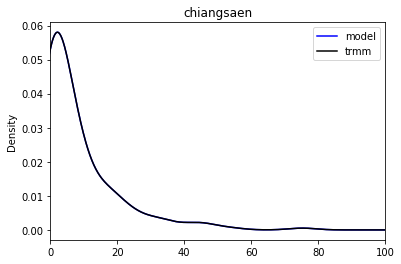

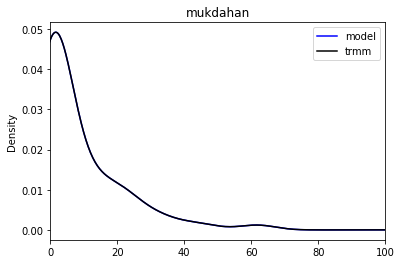

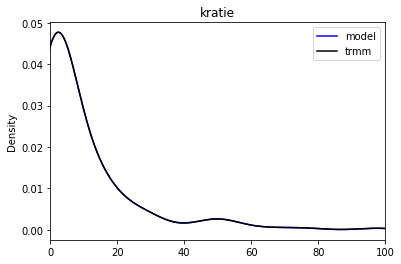

In [327]:
plotpdf(chiangsaen_loc,trmm,trmm14,'chiangsaen')
plotpdf(mukdahan_loc,trmm,trmm14,'mukdahan')
plotpdf(kratie_loc,trmm,trmm14,'kratie')
plt.show()

## Plot histograms and PDF for all WRF experiment outputs

In [5]:
#get list of files
file_list2014=[]
file_list2015=[]
for name in glob.glob('../parameterization_exp/wrfpost_run*_2014_d01.nc'):
    file_list2014.append(name)
for name in glob.glob('../parameterization_exp/wrfpost_run*_2015_d01.nc'):
    file_list2015.append(name)

#rearrange files by number
print('rearranging files')
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

file_list2014.sort(key=natural_keys)
file_list2015.sort(key=natural_keys)

rearranging files


rearranging files
working on../parameterization_exp/wrfpost_run_14_2014_d01.nc ../parameterization_exp/wrfpost_run_01_2015_d01.nc


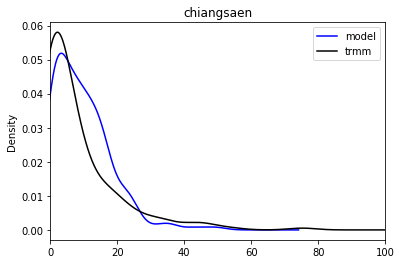

working on../parameterization_exp/wrfpost_run_15_2014_d01.nc ../parameterization_exp/wrfpost_run_02_2015_d01.nc


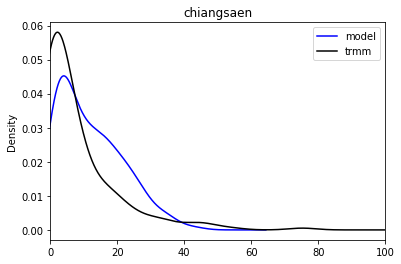

working on../parameterization_exp/wrfpost_run_16_2014_d01.nc ../parameterization_exp/wrfpost_run_03_2015_d01.nc


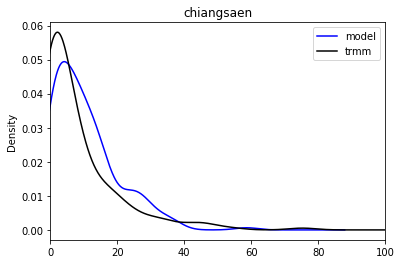

working on../parameterization_exp/wrfpost_run_17_2014_d01.nc ../parameterization_exp/wrfpost_run_04_2015_d01.nc


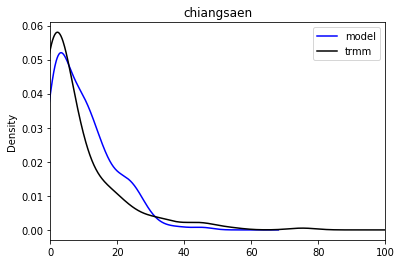

working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc


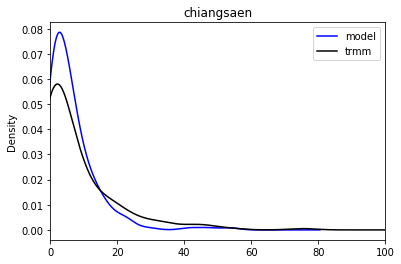

working on../parameterization_exp/wrfpost_run_19_2014_d01.nc ../parameterization_exp/wrfpost_run_06_2015_d01.nc


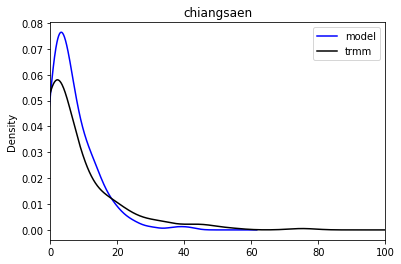

working on../parameterization_exp/wrfpost_run_20_2014_d01.nc ../parameterization_exp/wrfpost_run_07_2015_d01.nc


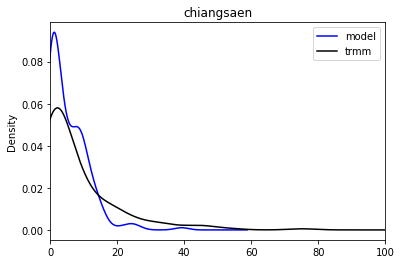

working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc


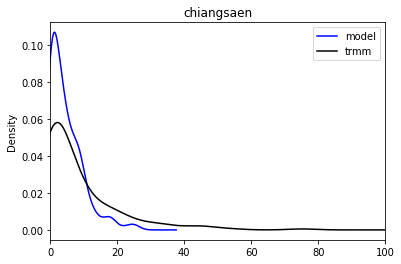

working on../parameterization_exp/wrfpost_run_22_2014_d01.nc ../parameterization_exp/wrfpost_run_09_2015_d01.nc


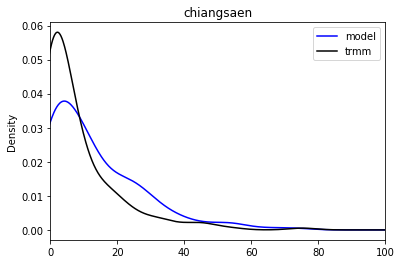

working on../parameterization_exp/wrfpost_run_23_2014_d01.nc ../parameterization_exp/wrfpost_run_10_2015_d01.nc


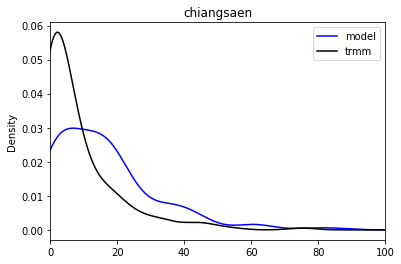

working on../parameterization_exp/wrfpost_run_24_2014_d01.nc ../parameterization_exp/wrfpost_run_11_2015_d01.nc


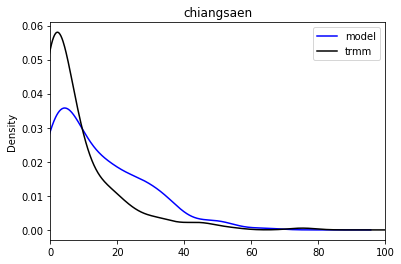

working on../parameterization_exp/wrfpost_run_25_2014_d01.nc ../parameterization_exp/wrfpost_run_12_2015_d01.nc


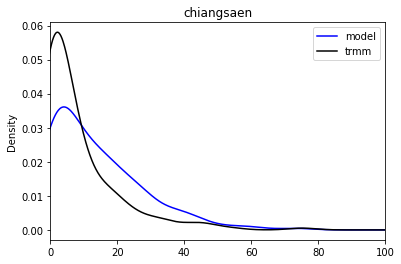

working on../parameterization_exp/wrfpost_run_26_2014_d01.nc ../parameterization_exp/wrfpost_run_13_2015_d01.nc


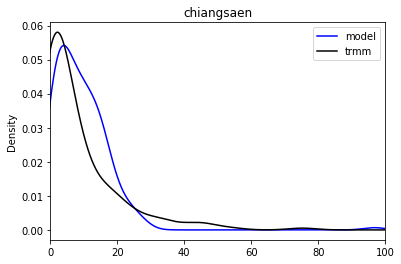

working on../parameterization_exp/wrfpost_run_28_2014_d01.nc ../parameterization_exp/wrfpost_run_27_2015_d01.nc


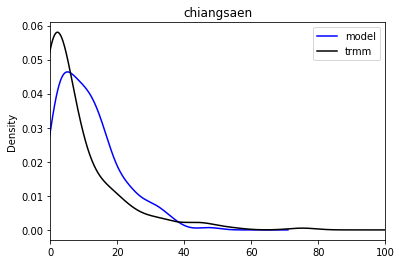

In [328]:
#combine files
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([184,la,lo])
    ppt[:92,:,:]=wrf2014.PPT
    ppt[92:,:,:]=wrf2015.PPT
    plotpdf(chiangsaen_loc,ppt,wrf2014,'chiangsaen')
    
    plt.show()

working on../parameterization_exp/wrfpost_run_14_2014_d01.nc ../parameterization_exp/wrfpost_run_01_2015_d01.nc


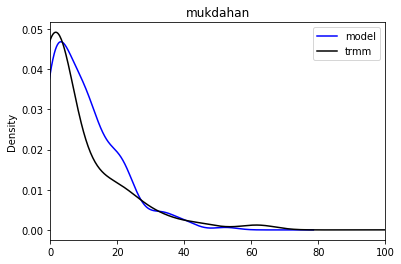

working on../parameterization_exp/wrfpost_run_15_2014_d01.nc ../parameterization_exp/wrfpost_run_02_2015_d01.nc


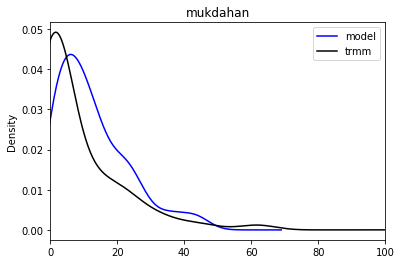

working on../parameterization_exp/wrfpost_run_16_2014_d01.nc ../parameterization_exp/wrfpost_run_03_2015_d01.nc


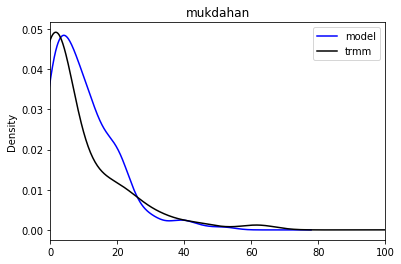

working on../parameterization_exp/wrfpost_run_17_2014_d01.nc ../parameterization_exp/wrfpost_run_04_2015_d01.nc


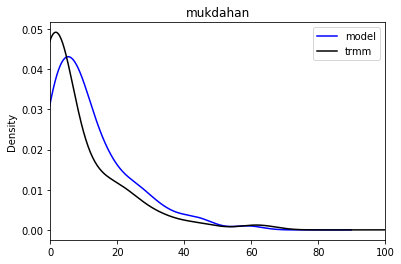

working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc


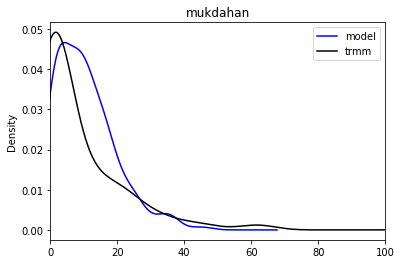

working on../parameterization_exp/wrfpost_run_19_2014_d01.nc ../parameterization_exp/wrfpost_run_06_2015_d01.nc


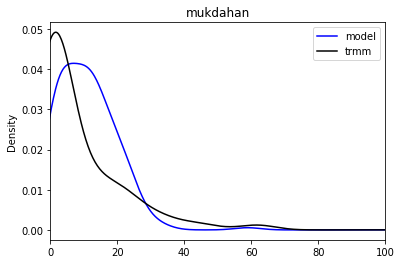

working on../parameterization_exp/wrfpost_run_20_2014_d01.nc ../parameterization_exp/wrfpost_run_07_2015_d01.nc


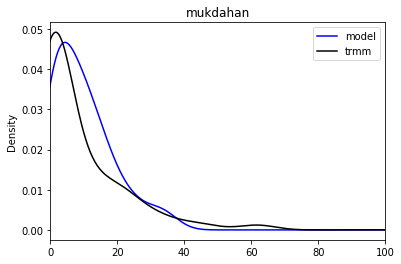

working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc


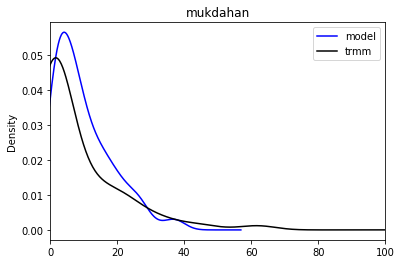

working on../parameterization_exp/wrfpost_run_22_2014_d01.nc ../parameterization_exp/wrfpost_run_09_2015_d01.nc


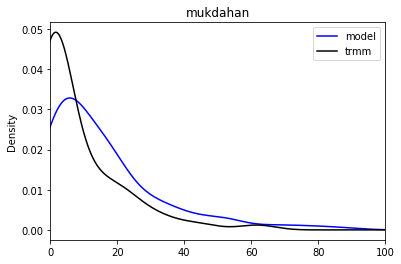

working on../parameterization_exp/wrfpost_run_23_2014_d01.nc ../parameterization_exp/wrfpost_run_10_2015_d01.nc


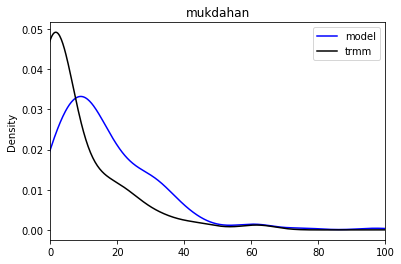

working on../parameterization_exp/wrfpost_run_24_2014_d01.nc ../parameterization_exp/wrfpost_run_11_2015_d01.nc


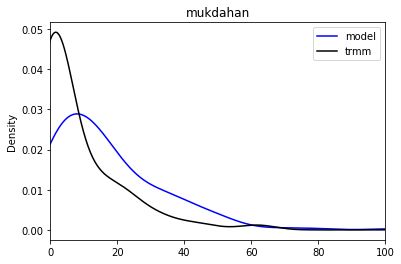

working on../parameterization_exp/wrfpost_run_25_2014_d01.nc ../parameterization_exp/wrfpost_run_12_2015_d01.nc


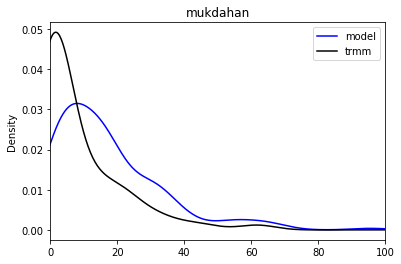

working on../parameterization_exp/wrfpost_run_26_2014_d01.nc ../parameterization_exp/wrfpost_run_13_2015_d01.nc


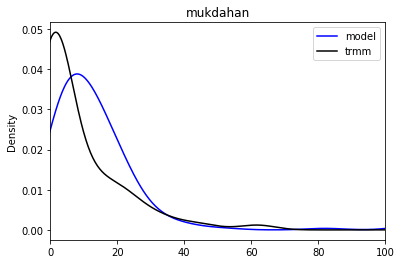

working on../parameterization_exp/wrfpost_run_28_2014_d01.nc ../parameterization_exp/wrfpost_run_27_2015_d01.nc


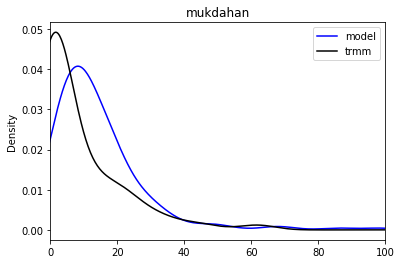

In [329]:
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([184,la,lo])
    ppt[:92,:,:]=wrf2014.PPT
    ppt[92:,:,:]=wrf2015.PPT
    plotpdf(mukdahan_loc,ppt,wrf2014,'mukdahan')
    
    plt.show()

working on../parameterization_exp/wrfpost_run_14_2014_d01.nc ../parameterization_exp/wrfpost_run_01_2015_d01.nc


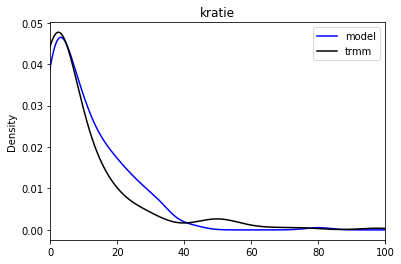

working on../parameterization_exp/wrfpost_run_15_2014_d01.nc ../parameterization_exp/wrfpost_run_02_2015_d01.nc


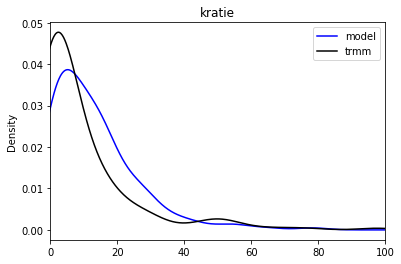

working on../parameterization_exp/wrfpost_run_16_2014_d01.nc ../parameterization_exp/wrfpost_run_03_2015_d01.nc


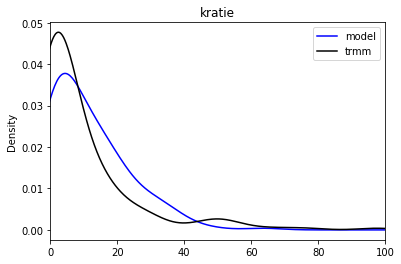

working on../parameterization_exp/wrfpost_run_17_2014_d01.nc ../parameterization_exp/wrfpost_run_04_2015_d01.nc


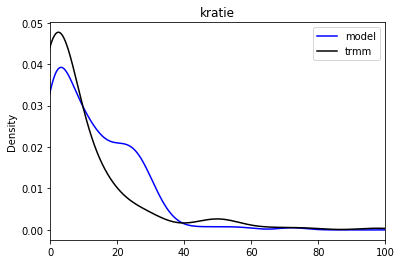

working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc


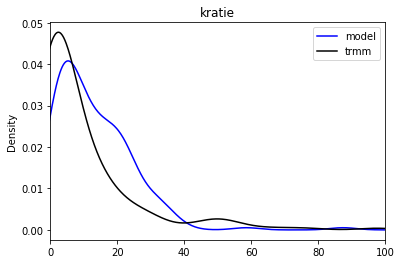

working on../parameterization_exp/wrfpost_run_19_2014_d01.nc ../parameterization_exp/wrfpost_run_06_2015_d01.nc


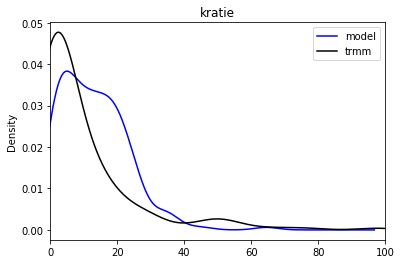

working on../parameterization_exp/wrfpost_run_20_2014_d01.nc ../parameterization_exp/wrfpost_run_07_2015_d01.nc


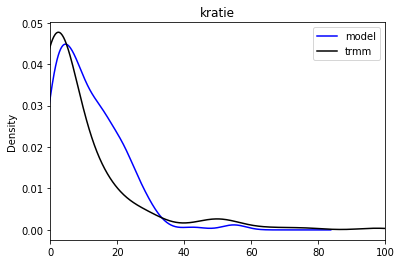

working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc


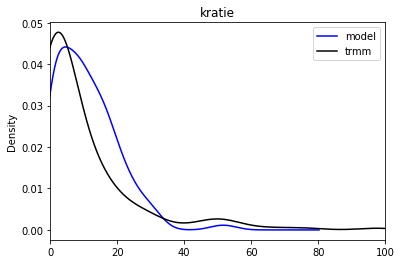

working on../parameterization_exp/wrfpost_run_22_2014_d01.nc ../parameterization_exp/wrfpost_run_09_2015_d01.nc


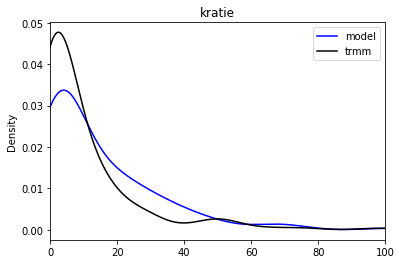

working on../parameterization_exp/wrfpost_run_23_2014_d01.nc ../parameterization_exp/wrfpost_run_10_2015_d01.nc


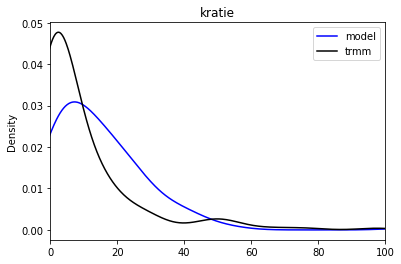

working on../parameterization_exp/wrfpost_run_24_2014_d01.nc ../parameterization_exp/wrfpost_run_11_2015_d01.nc


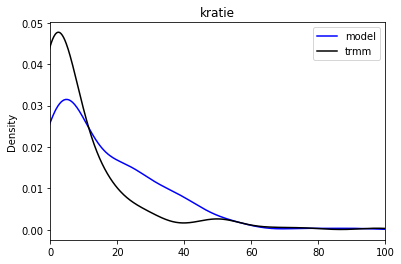

working on../parameterization_exp/wrfpost_run_25_2014_d01.nc ../parameterization_exp/wrfpost_run_12_2015_d01.nc


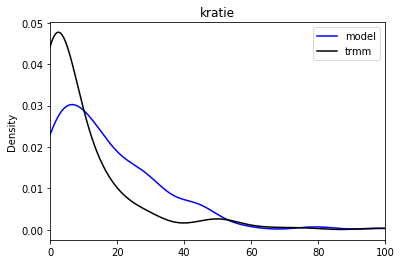

working on../parameterization_exp/wrfpost_run_26_2014_d01.nc ../parameterization_exp/wrfpost_run_13_2015_d01.nc


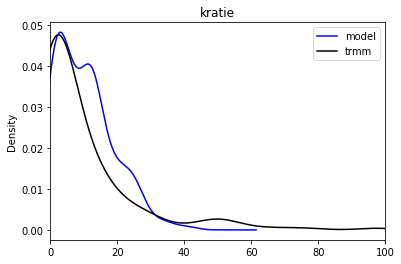

working on../parameterization_exp/wrfpost_run_28_2014_d01.nc ../parameterization_exp/wrfpost_run_27_2015_d01.nc


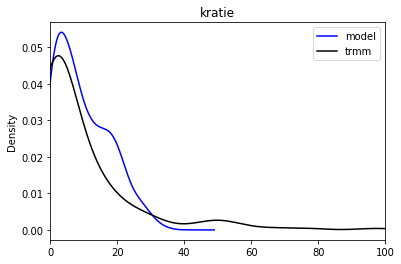

In [330]:
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([184,la,lo])
    ppt[:92,:,:]=wrf2014.PPT
    ppt[92:,:,:]=wrf2015.PPT
    plotpdf(kratie_loc,ppt,wrf2014,'kratie')
    
    plt.show()

rearranging files
working on../parameterization_exp/wrfpost_par2_d01.nc ../parameterization_exp/wrfpost_par6_d01.nc
working on../parameterization_exp/wrfpost_run_25_2014_d01.nc ../parameterization_exp/wrfpost_run_12_2015_d01.nc


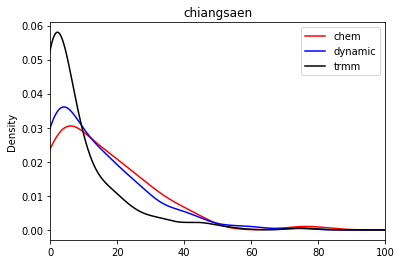

working on../parameterization_exp/wrfpost_par3_d01.nc ../parameterization_exp/wrfpost_par7_d01.nc
working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc


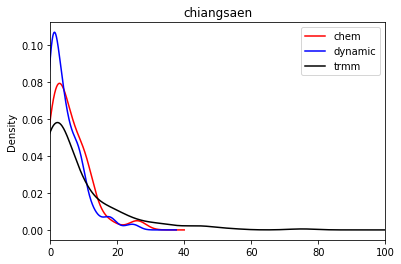

working on../parameterization_exp/wrfpost_par4_d01.nc ../parameterization_exp/wrfpost_par8_d01.nc
working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc


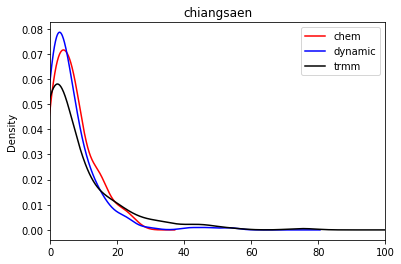

In [339]:
file_list2014=[]
file_list2015=[]
file_list2014dyn=[]
file_list2015dyn=[]
# for name in glob.glob('../parameterization_exp/wrfpost_par*d01.nc'):
#     file_list2014.append(name)
# for name in glob.glob('../parameterization_exp/wrfpost_par*d01.nc'):
#     file_list2015.append(name)
file_list2014.append('../parameterization_exp/wrfpost_par2_d01.nc')
file_list2014.append('../parameterization_exp/wrfpost_par3_d01.nc')
file_list2014.append('../parameterization_exp/wrfpost_par4_d01.nc')
file_list2015.append('../parameterization_exp/wrfpost_par6_d01.nc')
file_list2015.append('../parameterization_exp/wrfpost_par7_d01.nc')
file_list2015.append('../parameterization_exp/wrfpost_par8_d01.nc')
file_list2015dyn.append('../parameterization_exp/wrfpost_run_12_2015_d01.nc')
file_list2014dyn.append('../parameterization_exp/wrfpost_run_25_2014_d01.nc')
file_list2015dyn.append('../parameterization_exp/wrfpost_run_08_2015_d01.nc')
file_list2014dyn.append('../parameterization_exp/wrfpost_run_21_2014_d01.nc')
file_list2015dyn.append('../parameterization_exp/wrfpost_run_05_2015_d01.nc')
file_list2014dyn.append('../parameterization_exp/wrfpost_run_18_2014_d01.nc')

#rearrange files by number
print('rearranging files')
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

file_list2014.sort(key=natural_keys)
file_list2015.sort(key=natural_keys)

def plotpdf3(loc,data,data2,frame,title):
    ilat,ilon=pos(loc,frame)
    ilattrmm,ilontrmm=pos(loc,trmm14)
    valtrmm=pd.DataFrame(trmm[:,ilattrmm,ilontrmm],columns=(['trmm']))
    val=pd.DataFrame(data[:,ilat,ilon],columns=['chem'])
    val2=pd.DataFrame(data2[:,ilat,ilon],columns=['dynamic'])
    ax=val.plot.density(color='red')
    val2.plot.density(ax=ax,color='blue')
    valtrmm.plot.density(ax=ax,color='black')
    ax.set_xbound(lower=0,upper=100)
    ax.set_title(title)

#combine files
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    print('working on'+file_list2014dyn[fileIndex],file_list2015dyn[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    wrf2014dyn=xr.open_dataset(file_list2014dyn[fileIndex])
    wrf2015dyn=xr.open_dataset(file_list2015dyn[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([62,la,lo])
    ppt[:31,:,:]=wrf2014.PPT
    ppt[31:,:,:]=wrf2015.PPT
    ppt2=np.zeros([184,la,lo])
    ppt2[:92,:,:]=wrf2014dyn.PPT
    ppt2[92:,:,:]=wrf2015dyn.PPT
    plotpdf3(chiangsaen_loc,ppt,ppt2,wrf2014,'chiangsaen')
    
    plt.show()

working on../parameterization_exp/wrfpost_par2_d01.nc ../parameterization_exp/wrfpost_par6_d01.nc
working on../parameterization_exp/wrfpost_run_25_2014_d01.nc ../parameterization_exp/wrfpost_run_12_2015_d01.nc


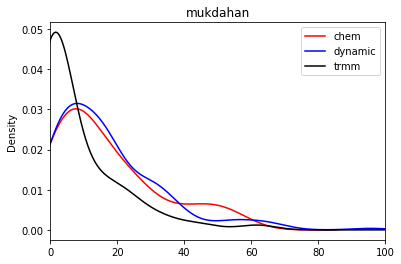

working on../parameterization_exp/wrfpost_par3_d01.nc ../parameterization_exp/wrfpost_par7_d01.nc
working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc


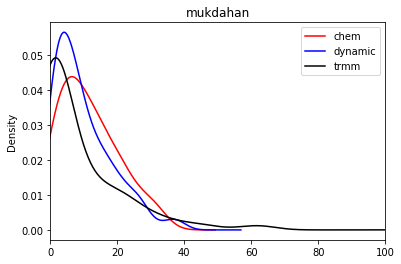

working on../parameterization_exp/wrfpost_par4_d01.nc ../parameterization_exp/wrfpost_par8_d01.nc
working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc


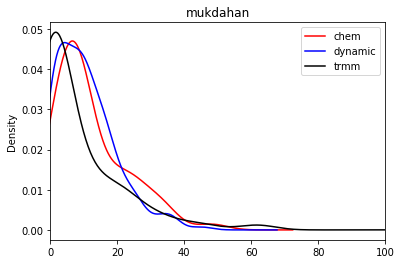

In [340]:
#combine files
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    print('working on'+file_list2014dyn[fileIndex],file_list2015dyn[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    wrf2014dyn=xr.open_dataset(file_list2014dyn[fileIndex])
    wrf2015dyn=xr.open_dataset(file_list2015dyn[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([62,la,lo])
    ppt[:31,:,:]=wrf2014.PPT
    ppt[31:,:,:]=wrf2015.PPT
    ppt2=np.zeros([184,la,lo])
    ppt2[:92,:,:]=wrf2014dyn.PPT
    ppt2[92:,:,:]=wrf2015dyn.PPT
    plotpdf3(mukdahan_loc,ppt,ppt2,wrf2014,'mukdahan')
    
    plt.show()

working on../parameterization_exp/wrfpost_par2_d01.nc ../parameterization_exp/wrfpost_par6_d01.nc
working on../parameterization_exp/wrfpost_run_25_2014_d01.nc ../parameterization_exp/wrfpost_run_12_2015_d01.nc


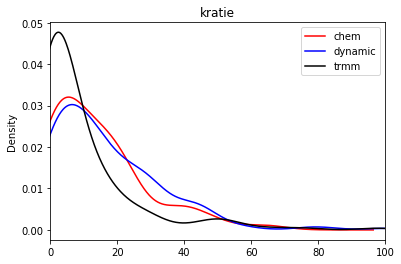

working on../parameterization_exp/wrfpost_par3_d01.nc ../parameterization_exp/wrfpost_par7_d01.nc
working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc


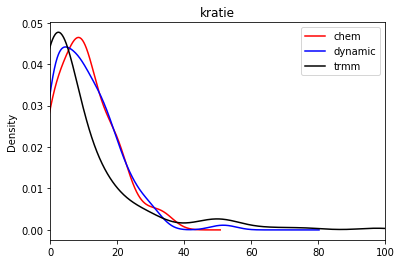

working on../parameterization_exp/wrfpost_par4_d01.nc ../parameterization_exp/wrfpost_par8_d01.nc
working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc


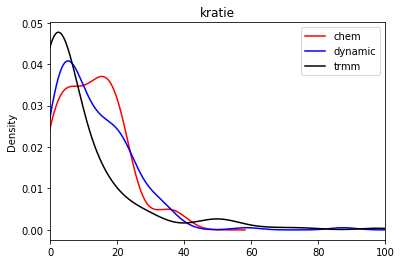

In [341]:
#combine files
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    print('working on'+file_list2014dyn[fileIndex],file_list2015dyn[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    wrf2014dyn=xr.open_dataset(file_list2014dyn[fileIndex])
    wrf2015dyn=xr.open_dataset(file_list2015dyn[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([62,la,lo])
    ppt[:31,:,:]=wrf2014.PPT
    ppt[31:,:,:]=wrf2015.PPT
    ppt2=np.zeros([184,la,lo])
    ppt2[:92,:,:]=wrf2014dyn.PPT
    ppt2[92:,:,:]=wrf2015dyn.PPT
    plotpdf3(kratie_loc,ppt,ppt2,wrf2014,'kratie')
    
    plt.show()

## plot spatial averages

rearranging files
working on../parameterization_exp/wrfpost_run_14_2014_d01.nc ../parameterization_exp/wrfpost_run_01_2015_d01.nc


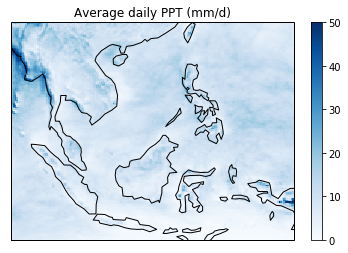

working on../parameterization_exp/wrfpost_run_15_2014_d01.nc ../parameterization_exp/wrfpost_run_02_2015_d01.nc


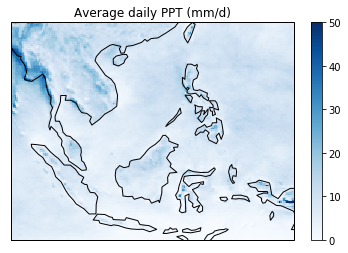

working on../parameterization_exp/wrfpost_run_16_2014_d01.nc ../parameterization_exp/wrfpost_run_03_2015_d01.nc


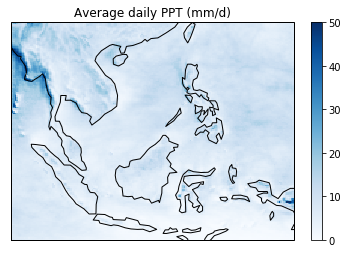

working on../parameterization_exp/wrfpost_run_17_2014_d01.nc ../parameterization_exp/wrfpost_run_04_2015_d01.nc


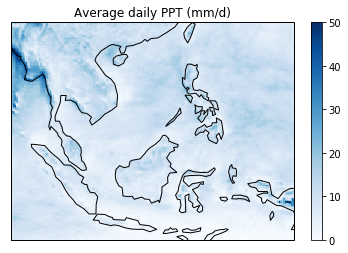

working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc


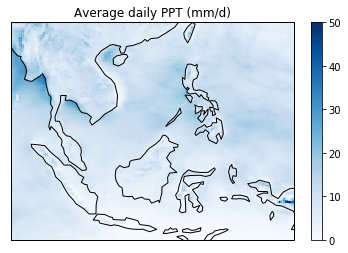

working on../parameterization_exp/wrfpost_run_19_2014_d01.nc ../parameterization_exp/wrfpost_run_06_2015_d01.nc


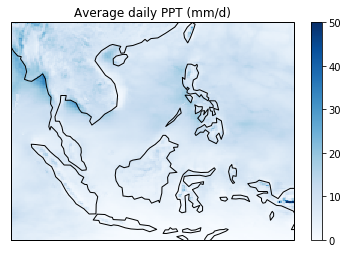

working on../parameterization_exp/wrfpost_run_20_2014_d01.nc ../parameterization_exp/wrfpost_run_07_2015_d01.nc


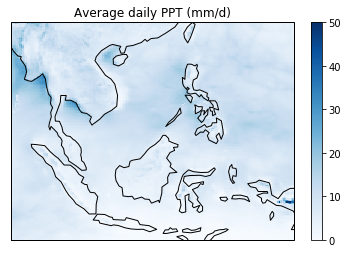

working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc


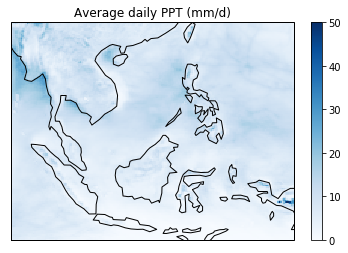

working on../parameterization_exp/wrfpost_run_22_2014_d01.nc ../parameterization_exp/wrfpost_run_09_2015_d01.nc


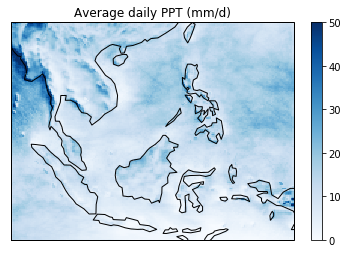

working on../parameterization_exp/wrfpost_run_23_2014_d01.nc ../parameterization_exp/wrfpost_run_10_2015_d01.nc


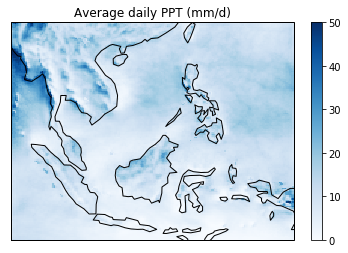

working on../parameterization_exp/wrfpost_run_24_2014_d01.nc ../parameterization_exp/wrfpost_run_11_2015_d01.nc


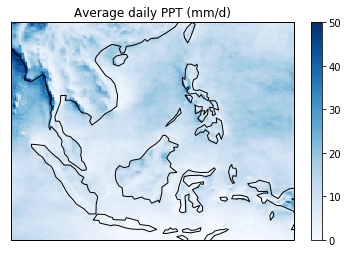

working on../parameterization_exp/wrfpost_run_25_2014_d01.nc ../parameterization_exp/wrfpost_run_12_2015_d01.nc


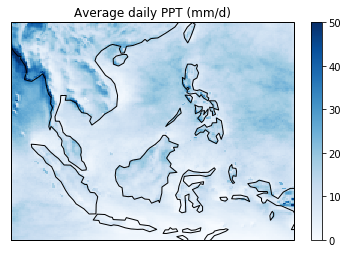

working on../parameterization_exp/wrfpost_run_26_2014_d01.nc ../parameterization_exp/wrfpost_run_13_2015_d01.nc


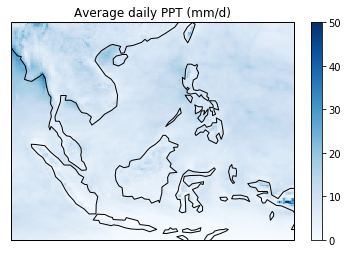

working on../parameterization_exp/wrfpost_run_28_2014_d01.nc ../parameterization_exp/wrfpost_run_27_2015_d01.nc


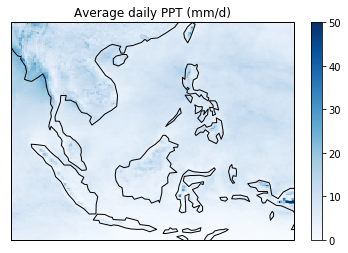

In [14]:
file_list2014=[]
file_list2015=[]
for name in glob.glob('../parameterization_exp/wrfpost_run*_2014_d01.nc'):
    file_list2014.append(name)
for name in glob.glob('../parameterization_exp/wrfpost_run*_2015_d01.nc'):
    file_list2015.append(name)

#rearrange files by number
print('rearranging files')
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

file_list2014.sort(key=natural_keys)
file_list2015.sort(key=natural_keys)

#combine files
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([184,la,lo])
    ppt[:92,:,:]=wrf2014.PPT
    ppt[92:,:,:]=wrf2015.PPT
    cmap='Blues'
    vminn=0
    vmaxx=50
    ax1=plt.subplot(projection=ccrs.PlateCarree())
    ax1.pcolor(wrf2014.lon,wrf2014.lat,np.mean(ppt,axis=0),vmin=vminn,vmax=vmaxx,cmap=cmap)
    ax1.coastlines()
    ax1.set_title('Average daily PPT (mm/d)')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=vminn, vmax=vmaxx))
    sm._A = []
    plt.colorbar(sm,ax=ax1,fraction=0.04, pad=0.05)
    
    plt.show()

rearranging files
working on../parameterization_exp/wrfpost_run_14_2014_d02.nc ../parameterization_exp/wrfpost_run_01_2015_d02.nc


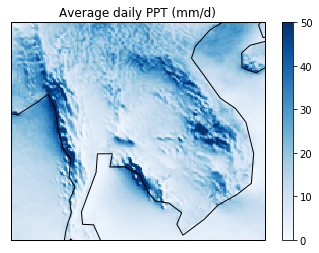

working on../parameterization_exp/wrfpost_run_15_2014_d02.nc ../parameterization_exp/wrfpost_run_02_2015_d02.nc


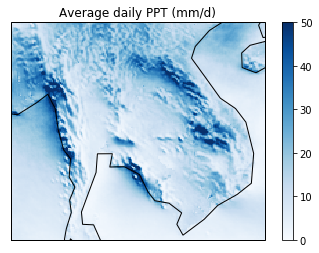

working on../parameterization_exp/wrfpost_run_16_2014_d02.nc ../parameterization_exp/wrfpost_run_03_2015_d02.nc


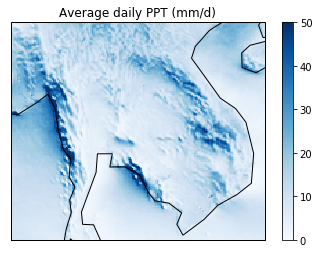

working on../parameterization_exp/wrfpost_run_17_2014_d02.nc ../parameterization_exp/wrfpost_run_04_2015_d02.nc


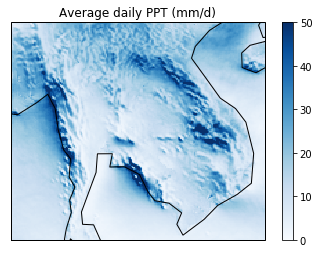

working on../parameterization_exp/wrfpost_run_18_2014_d02.nc ../parameterization_exp/wrfpost_run_05_2015_d02.nc


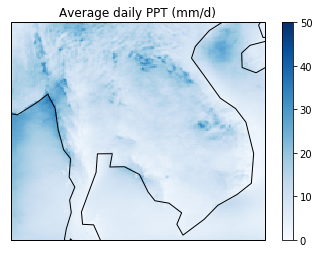

working on../parameterization_exp/wrfpost_run_19_2014_d02.nc ../parameterization_exp/wrfpost_run_06_2015_d02.nc


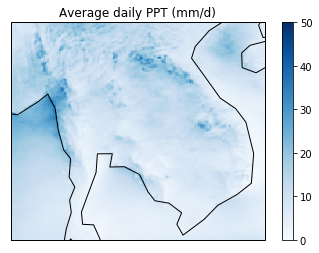

working on../parameterization_exp/wrfpost_run_20_2014_d02.nc ../parameterization_exp/wrfpost_run_07_2015_d02.nc


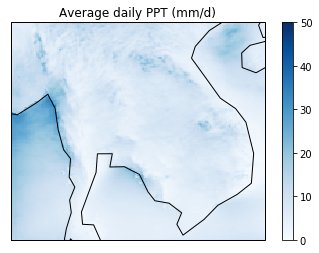

working on../parameterization_exp/wrfpost_run_21_2014_d02.nc ../parameterization_exp/wrfpost_run_08_2015_d02.nc


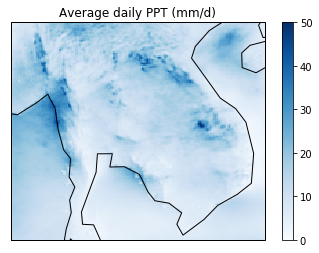

working on../parameterization_exp/wrfpost_run_22_2014_d02.nc ../parameterization_exp/wrfpost_run_09_2015_d02.nc


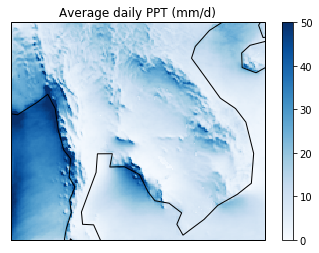

working on../parameterization_exp/wrfpost_run_23_2014_d02.nc ../parameterization_exp/wrfpost_run_10_2015_d02.nc


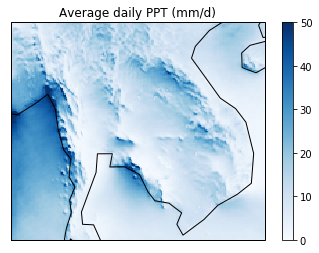

working on../parameterization_exp/wrfpost_run_24_2014_d02.nc ../parameterization_exp/wrfpost_run_11_2015_d02.nc


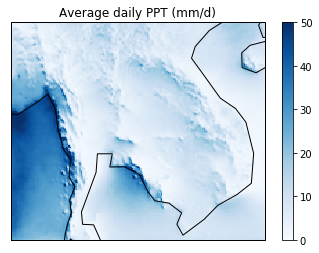

working on../parameterization_exp/wrfpost_run_25_2014_d02.nc ../parameterization_exp/wrfpost_run_12_2015_d02.nc


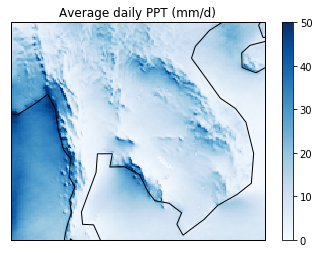

working on../parameterization_exp/wrfpost_run_26_2014_d02.nc ../parameterization_exp/wrfpost_run_13_2015_d02.nc


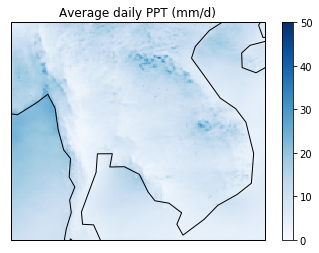

working on../parameterization_exp/wrfpost_run_28_2014_d02.nc ../parameterization_exp/wrfpost_run_27_2015_d02.nc


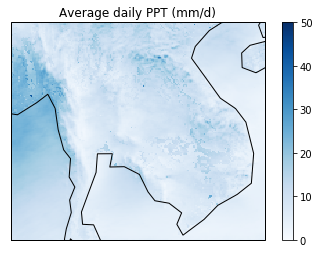

In [15]:
file_list2014=[]
file_list2015=[]
for name in glob.glob('../parameterization_exp/wrfpost_run*_2014_d02.nc'):
    file_list2014.append(name)
for name in glob.glob('../parameterization_exp/wrfpost_run*_2015_d02.nc'):
    file_list2015.append(name)

#rearrange files by number
print('rearranging files')
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

file_list2014.sort(key=natural_keys)
file_list2015.sort(key=natural_keys)

#combine files
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([184,la,lo])
    ppt[:92,:,:]=wrf2014.PPT
    ppt[92:,:,:]=wrf2015.PPT
    cmap='Blues'
    vminn=0
    vmaxx=50
    ax1=plt.subplot(projection=ccrs.PlateCarree())
    ax1.pcolor(wrf2014.lon,wrf2014.lat,np.mean(ppt,axis=0),vmin=vminn,vmax=vmaxx,cmap=cmap)
    ax1.coastlines()
    ax1.set_title('Average daily PPT (mm/d)')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=vminn, vmax=vmaxx))
    sm._A = []
    plt.colorbar(sm,ax=ax1,fraction=0.04, pad=0.05)
    
    plt.show()

## box plots

In [15]:
def plotbox(loc,data,frame,title):
    ilat,ilon=pos(loc,frame)
    ilattrmm,ilontrmm=pos(loc,trmm14)
    valtrmm=pd.DataFrame(trmm[:,ilattrmm,ilontrmm],columns=(['trmm']))
    val=pd.DataFrame(data[:,ilat,ilon],columns=['model'])
#     ax=plt.boxplot(val['model'])
    return data[:,ilat,ilon]
#     ax.set_title(title)
    
plotbox(chiangsaen_loc,trmm,trmm14,'chiangsaen')
plt.show()

In [23]:
wrf2014=xr.open_dataset(file_list2014[0])
everything=np.empty([len(file_list2014)+1,184])
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    ppt=np.zeros([184,la,lo])
    ppt[:92,:,:]=wrf2014.PPT
    ppt[92:,:,:]=wrf2015.PPT
    everything[fileIndex,:]=plotbox(chiangsaen_loc,ppt,wrf2014,'chiangsaen')
ilattrmm,ilontrmm=pos(chiangsaen_loc,trmm14)
everything[-1,:]=trmm[:,ilattrmm,ilontrmm]
print(np.shape(everything))

working on../parameterization_exp/wrfpost_run_14_2014_d01.nc ../parameterization_exp/wrfpost_run_01_2015_d01.nc
working on../parameterization_exp/wrfpost_run_15_2014_d01.nc ../parameterization_exp/wrfpost_run_02_2015_d01.nc
working on../parameterization_exp/wrfpost_run_16_2014_d01.nc ../parameterization_exp/wrfpost_run_03_2015_d01.nc
working on../parameterization_exp/wrfpost_run_17_2014_d01.nc ../parameterization_exp/wrfpost_run_04_2015_d01.nc
working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc
working on../parameterization_exp/wrfpost_run_19_2014_d01.nc ../parameterization_exp/wrfpost_run_06_2015_d01.nc
working on../parameterization_exp/wrfpost_run_20_2014_d01.nc ../parameterization_exp/wrfpost_run_07_2015_d01.nc
working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc
working on../parameterization_exp/wrfpost_run_22_2014_d01.nc ../parameterization_exp/wrfpost_run_09_2015

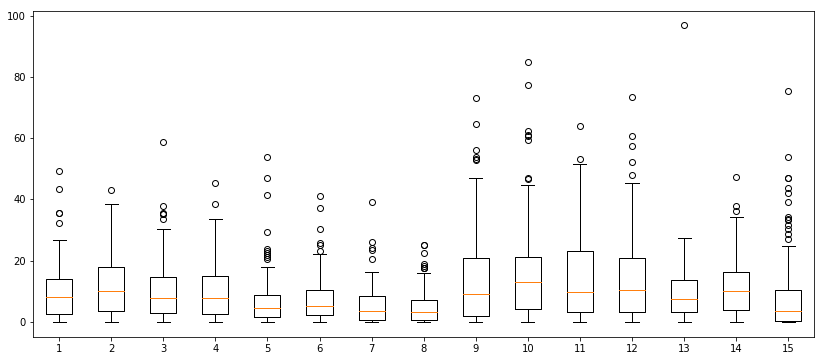

In [24]:
plt.rcParams["figure.figsize"] = 14,6
plt.boxplot(everything.T)
plt.show()

## Spatial average for TRMM DATA

rearranging files
working on../parameterization_exp/trmm_2014_JunAug.nc ../parameterization_exp/trmm_2015_JunAug.nc


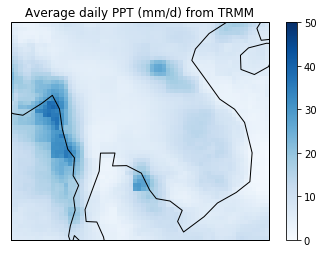

working on../parameterization_exp/trmm_2014big_JunAug.nc ../parameterization_exp/trmm_2015big_JunAug.nc


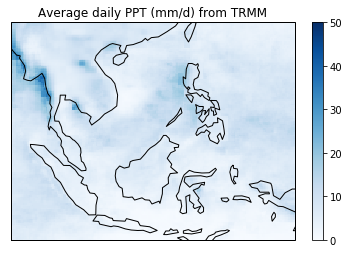

In [2]:
file_list2014=[]
file_list2015=[]
for name in glob.glob('../parameterization_exp/trmm_2014*'):
    file_list2014.append(name)
for name in glob.glob('../parameterization_exp/trmm_2015*'):
    file_list2015.append(name)

#rearrange files by number
print('rearranging files')
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

file_list2014.sort(key=natural_keys)
file_list2015.sort(key=natural_keys)

#combine files
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([184,la,lo])
    ppt[:92,:,:]=wrf2014.PPT
    ppt[92:,:,:]=wrf2015.PPT
    cmap='Blues'
    vminn=0
    vmaxx=50
    ax1=plt.subplot(projection=ccrs.PlateCarree())
    ax1.pcolor(wrf2014.lon,wrf2014.lat,np.mean(ppt,axis=0),vmin=vminn,vmax=vmaxx,cmap=cmap)
    ax1.coastlines()
    ax1.set_title('Average daily PPT (mm/d) from TRMM')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=vminn, vmax=vmaxx))
    sm._A = []
    plt.colorbar(sm,ax=ax1,fraction=0.04, pad=0.05)
    
    plt.show()